In [22]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn

!pip install graphviz

!pip install xlrd
!pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
%matplotlib inline

In [19]:
DATA_PATH = "../data/"

path = DATA_PATH + "Telco_data_clean.csv"

In [20]:
df = pd.read_csv(path)

In [21]:
df.head()

,Unnamed: 0,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Zip Code,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,0,1,5433,0,0,1,None,0,0.00,0,...,90022,34.023810,-118.156582,Male,78,0,1,0,0,0
1,1,1,5302,1,1,8,Offer E,1,48.85,1,...,90063,34.044271,-118.185237,Female,74,0,1,1,1,1
2,2,1,3179,0,0,18,Offer D,1,11.33,1,...,90065,34.108833,-118.229715,Male,71,0,1,0,1,3
3,3,1,5337,1,1,25,Offer C,1,19.76,0,...,90303,33.936291,-118.332639,Female,78,0,1,1,1,1
4,4,1,2793,1,1,37,Offer C,1,6.33,1,...,90602,33.972119,-118.020188,Female,80,0,1,1,1,1


In [22]:
df.corr()

,Unnamed: 0,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Avg Monthly GB Download,...,Total Revenue,Zip Code,Latitude,Longitude,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
Unnamed: 0,1.000000,-0.618015,0.074232,0.075981,0.157171,0.177405,-0.025177,-0.011818,-0.114326,0.029925,...,0.060528,0.056339,0.076792,-0.052932,-0.442162,0.151261,-0.638409,0.074254,0.312925,0.280906
Churn Label,-0.618015,1.000000,-0.127463,-0.149122,-0.286540,-0.352861,0.011942,0.008120,0.040102,0.048868,...,-0.223003,-0.016289,-0.041546,0.024052,0.115760,-0.054604,0.150889,-0.150448,-0.248542,-0.218780
CLTV,0.074232,-0.127463,1.000000,0.125249,0.122843,0.396292,0.023015,0.023858,0.133568,0.023043,...,0.354198,-0.003207,0.000214,-0.000513,-0.001826,-0.008363,-0.003167,0.137859,0.058222,0.049611
Referred a Friend,0.075981,-0.149122,0.125249,1.000000,0.708291,0.361844,0.015418,0.008702,0.132641,0.055003,...,0.314777,-0.000907,0.002449,0.003300,-0.004702,0.016476,0.009714,0.949987,0.346678,0.309319
Number of Referrals,0.157171,-0.286540,0.122843,0.708291,1.000000,0.326975,0.009947,0.006336,0.078080,0.038575,...,0.261853,0.001463,0.018715,-0.009893,-0.025141,0.023400,-0.026575,0.672867,0.307050,0.278003
Tenure in Months,0.177405,-0.352861,0.396292,0.361844,0.326975,1.000000,0.008271,0.014596,0.332101,0.049119,...,0.853146,0.007146,0.011963,-0.009672,0.009927,-0.000317,0.016299,0.380394,0.132081,0.108237
Phone Service,-0.025177,0.011942,0.023015,0.015418,0.009947,0.008271,1.000000,0.486673,0.279690,-0.102748,...,0.174788,-0.008830,-0.019188,0.017360,0.009965,-0.008823,0.008576,0.017706,0.000625,-0.010149
Avg Monthly Long Distance Charges,-0.011818,0.008120,0.023858,0.008702,0.006336,0.014596,0.486673,1.000000,0.136004,-0.030455,...,0.232291,0.005894,0.002631,-0.004341,-0.011749,0.009360,-0.000713,0.010215,-0.005586,-0.007324
Multiple Lines,-0.114326,0.040102,0.133568,0.132641,0.078080,0.332101,0.279690,0.136004,1.000000,0.091679,...,0.466583,-0.021183,-0.028369,0.025316,0.103122,-0.035287,0.142948,0.142057,-0.027510,-0.030307
Avg Monthly GB Download,0.029925,0.048868,0.023043,0.055003,0.038575,0.049119,-0.102748,-0.030455,0.091679,1.000000,...,0.180726,-0.010998,-0.027676,0.030979,-0.376595,0.522598,-0.101874,0.056745,0.075161,0.129966


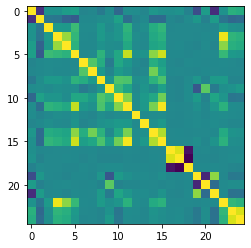

In [23]:
plt.imshow(df.corr())

In [24]:
df.head()

,Unnamed: 0,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Zip Code,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,0,1,5433,0,0,1,None,0,0.00,0,...,90022,34.023810,-118.156582,Male,78,0,1,0,0,0
1,1,1,5302,1,1,8,Offer E,1,48.85,1,...,90063,34.044271,-118.185237,Female,74,0,1,1,1,1
2,2,1,3179,0,0,18,Offer D,1,11.33,1,...,90065,34.108833,-118.229715,Male,71,0,1,0,1,3
3,3,1,5337,1,1,25,Offer C,1,19.76,0,...,90303,33.936291,-118.332639,Female,78,0,1,1,1,1
4,4,1,2793,1,1,37,Offer C,1,6.33,1,...,90602,33.972119,-118.020188,Female,80,0,1,1,1,1


In [25]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [28]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Zip Code,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,1,5433,0,0,1,0,0,0.00,0,1,...,90022,34.023810,-118.156582,1,78,0,1,0,0,0
1,1,5302,1,1,8,5,1,48.85,1,1,...,90063,34.044271,-118.185237,0,74,0,1,1,1,1
2,1,3179,0,0,18,4,1,11.33,1,1,...,90065,34.108833,-118.229715,1,71,0,1,0,1,3
3,1,5337,1,1,25,3,1,19.76,0,1,...,90303,33.936291,-118.332639,0,78,0,1,1,1,1
4,1,2793,1,1,37,3,1,6.33,1,1,...,90602,33.972119,-118.020188,0,80,0,1,1,1,1


In [29]:
from sklearn.model_selection import train_test_split
target = 'Churn Label'
X = df.drop(target, axis=1)
Y = df[target]
training_features, testing_features, training_target, testing_target = train_test_split(X, Y,
                     test_size=0.1, train_size=None, random_state=None, shuffle=True, stratify=None)

In [30]:
training_features.head()

,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Zip Code,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
4016,4080,1,5,71,1,1,36.50,1,1,2,...,93244,36.462671,-118.997291,0,61,0,0,1,1,2
5787,6375,1,1,72,1,1,24.90,1,1,1,...,90304,33.936827,-118.359824,0,46,0,0,1,1,1
1324,3700,1,1,1,0,1,32.08,0,1,1,...,94520,38.013825,-122.039144,1,21,1,0,1,0,0
440,4389,0,0,66,0,1,9.90,1,1,2,...,96148,39.241240,-120.054765,1,69,0,1,0,0,0
4357,5133,0,0,66,0,1,21.37,0,1,1,...,95310,38.085839,-120.378550,0,25,1,0,0,0,0


In [31]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(training_features, training_target)

DecisionTreeRegressor(max_depth=3)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
pred = model.predict(testing_features)
print(testing_target.shape)
pred = np.where(pred < 0.5, 0, 1)
print(pred.shape)

(705,)
(705,)


In [34]:
accuracy_score(testing_target, pred)

0.7716312056737589

In [35]:
import graphviz
from sklearn import tree

In [36]:
dot_data = tree.export_graphviz(model, feature_names = list(training_features), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 

In [37]:
graph.render(view=True)

'Source.gv.pdf'

#### Linear regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression().fit(training_features, training_target)

In [40]:
reg.score(testing_features, testing_target)

0.32767054586623956